In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# styling
sns.set(style="whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ML/clusteringmidterm.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isna().sum()

df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())


In [ ]:
df_clean = df.drop("CUST_ID", axis=1)


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')


In [ ]:
df = df.fillna(df.median())


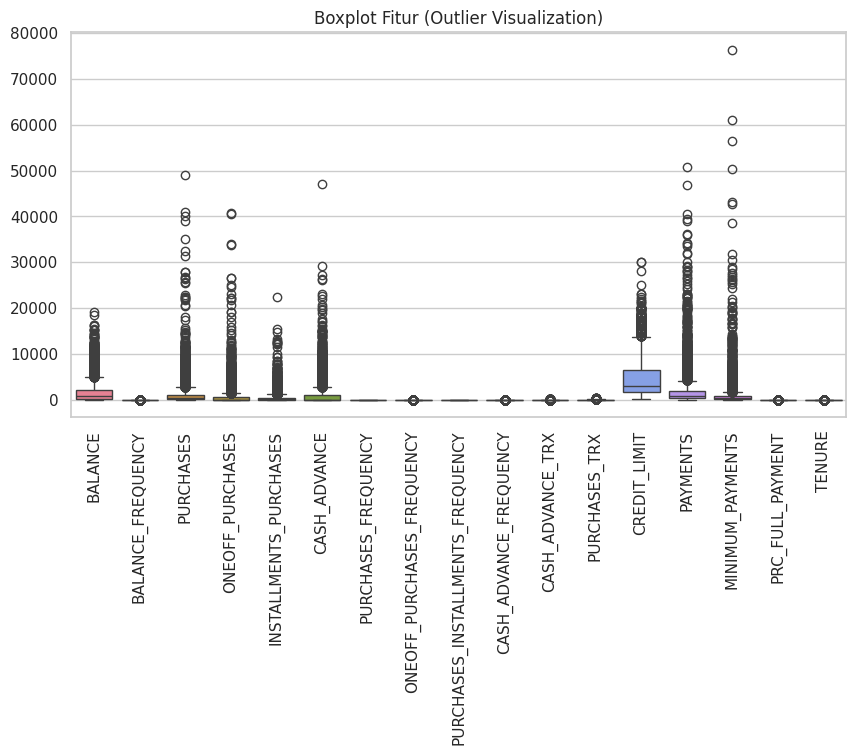

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean)
plt.title("Boxplot Fitur (Outlier Visualization)")
plt.xticks(rotation=90)
plt.show()


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


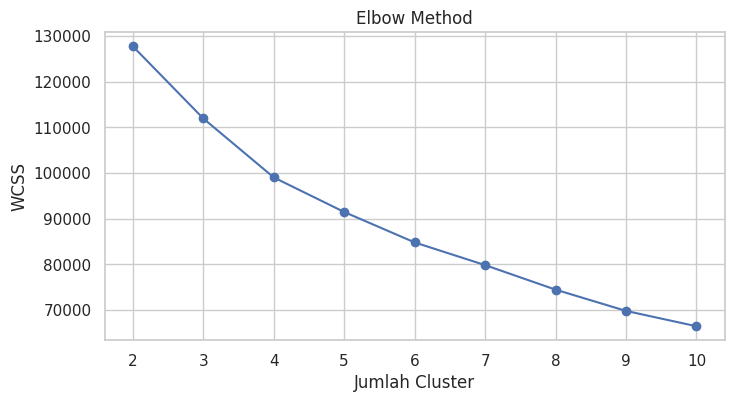

In [ ]:
wcss = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.show()


In [ ]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"k = {k} → Silhouette Score = {score:.4f}")


k = 2 → Silhouette Score = 0.2795
k = 3 → Silhouette Score = 0.2067
k = 4 → Silhouette Score = 0.1665
k = 5 → Silhouette Score = 0.1926
k = 6 → Silhouette Score = 0.1923
k = 7 → Silhouette Score = 0.2153
k = 8 → Silhouette Score = 0.2036
k = 9 → Silhouette Score = 0.2038
k = 10 → Silhouette Score = 0.2116


In [ ]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df["Cluster"] = clusters
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,NaN,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,NaN,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,NaN,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,NaN,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,NaN,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


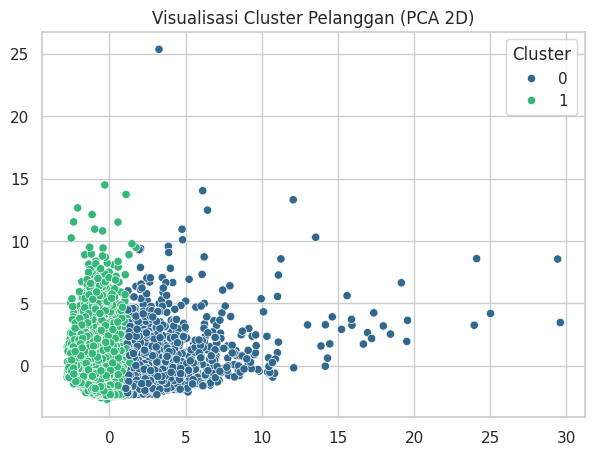

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["Cluster"], palette="viridis")
plt.title("Visualisasi Cluster Pelanggan (PCA 2D)")
plt.show()



In [ ]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,,
0,NaN,2147.310087,0.979774,3364.893645,2075.077145,1290.139081,761.443235,0.937914,0.588182,0.712940,0.082253,2.232258,46.131183,7182.543988,3595.423358,1195.056462,0.285596,11.891935
1,NaN,1411.573053,0.850380,383.636260,203.479687,180.450879,1035.911430,0.372936,0.101266,0.273011,0.149020,3.515515,6.466714,3789.040383,1244.590977,753.048031,0.119117,11.419041


Cluster 0 – High Spenders (Pengguna Tinggi)

Ciri-ciri utama:

- Balance sangat tinggi (2147)

- Purchases besar (3364)

- One-off purchases tinggi → sering melakukan transaksi besar sekali bayar

- Installment purchases besar → aktif menggunakan cicilan

- Cash advance relatif sedang

- Purchase frequency sangat aktif (0.93)

- Credit limit besar (7182)

- Payments tinggi (3595) → pembayaran besar

- Minimum payments tinggi (1195)

Interpretasi:

Cluster ini merupakan pelanggan dengan aktivitas transaksi tinggi, limit kredit besar, sering berbelanja baik satu kali bayar maupun cicilan. Mereka adalah nasabah bernilai tinggi (high-value customers) yang banyak menggunakan kartu kredit untuk berbagai jenis pembelanjaan.

Cluster 1 – Low Spenders (Pengguna Rendah/Pasif)

Ciri-ciri utama:

- Balance rendah (1411)

- Purchases sangat kecil (383)

- One-off purchases rendah

- Installment purchases rendah

- Purchase frequency rendah (0.37)

- Cash advance sering dilakukan namun jumlahnya tidak terlalu besar

- Credit limit lebih rendah (3789)

- Payments lebih kecil (1244)

- Minimum payments juga lebih kecil (753)

Interpretasi:

Cluster ini berisi pelanggan yang kurang aktif, freq transaksi rendah, dan hanya melakukan pembelian kecil. Mereka cenderung menggunakan kartu kredit hanya untuk kebutuhan dasar atau sesekali.